## Importing necessary libraries and dataset

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime, timedelta
from dateutil.tz import gettz

In [2]:
df = pd.read_csv('dstest.csv')
print(df.shape)
df.head()

(385165, 13)


,company,live,mediaEngine,p2p,cdn,upload,peers_count,peers_match,timestamp,sessionDuration,playbackErrorCount,totalPlaybackErrorCount,content
0,Streamroot TV,VOD,ME1,0.0,8507376.0,0.0,0.0,1,1562469807407,120000.0,0,0,content-09235
1,Streamroot TV,VOD,ME1,0.0,5778744.0,0.0,0.0,0,1562469927310,240000.0,0,0,content-09235
2,Streamroot TV,VOD,ME1,0.0,7692960.0,0.0,0.0,0,1562470047330,360000.0,0,0,content-09235
3,Streamroot TV,VOD,ME1,0.0,8229888.0,0.0,0.0,0,1562470167720,480000.0,0,0,content-09235
4,Streamroot TV,VOD,ME1,0.0,10387000.0,0.0,0.0,0,1562470287353,600000.0,0,0,content-09235


In [3]:
df['company'].value_counts()

Streamroot TV    370832
Flash Infos       12432
Sports News        1901
Name: company, dtype: int64

In [4]:
df['peers_count'].value_counts()
df[df['peers_count'] == 20.83]

,company,live,mediaEngine,p2p,cdn,upload,peers_count,peers_match,timestamp,sessionDuration,playbackErrorCount,totalPlaybackErrorCount,content
128891,Streamroot TV,VOD,ME1,386556764.0,0.0,0.0,20.83,40,1562465500429,240000.0,0,0,content-14609


In [103]:
df.iloc[-1]

company                    Streamroot TV
live                                 VOD
mediaEngine                          ME1
p2p                                    0
cdn                                    0
upload                       6.73996e+06
peers_count                        16.73
peers_match                           40
timestamp                  1562479110208
sessionDuration                 2.28e+06
playbackErrorCount                     0
totalPlaybackErrorCount                0
content                    content-05335
readableDate                       07:56
isFirstPayload                          
isLastPayLoad                           
Name: 385164, dtype: object

In [6]:
df['isFirstPayload'] = ''
df['isLastPayLoad'] = ''
num = len(df)
for i in range(num):
    if i == 0:
        df['isFirstPayload'][i] = True
        df['isLastPayLoad'][i] = False
    elif df['sessionDuration'][i] == 120000:
        df['isFirstPayload'][i] = True
        df['isLastPayLoad'][i-1] = True
    elif i == num:
        df['isFirstPayload'][i] = False
        df['isLastPayLoad'][i] = True
    else:
        df['isFirstPayload'][i] = False
        df['isLastPayLoad'][i-1] = False

/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  import sys
/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  from ipykernel import kernelapp as app
/opt/anaconda3/lib/python3.7/site-packages/ip

In [176]:
from datetime import datetime
df['readableDate'] =  ''
df['readableDate'] = df['timestamp'].apply(lambda x: datetime.fromtimestamp(x/1000))
df['readableDate'] = (df['readableDate'] - timedelta(minutes = 2)).dt.strftime('%H:%M')
df['readableDate'] = df['readableDate'].apply(lambda x: datetime.strptime(x, '%H:%M'))
df['readableDate'].value_counts()

1900-01-01 07:57:00    1968
1900-01-01 07:55:00    1941
1900-01-01 07:56:00    1908
1900-01-01 07:51:00    1893
1900-01-01 07:53:00    1893
                       ... 
1900-01-01 02:03:00     207
1900-01-01 02:00:00     151
1900-01-01 02:01:00     139
1900-01-01 01:58:00      75
1900-01-01 01:59:00      70
Name: readableDate, Length: 360, dtype: int64

In [171]:
pd.reset_option("all")
df['DateTime'] = df['timestamp'].apply(lambda x: datetime.fromtimestamp(x/1000))
df['DateTime'] = (df['DateTime'] - timedelta(minutes = 2)).dt.strftime('%d-%m-%Y %H:%M')
df['DateTime'] = df['DateTime'].apply(lambda x: datetime.strptime(x, '%d-%m-%Y %H:%M'))
df['DateTime'] = df['DateTime'].apply(lambda x: datetime.timestamp(x))
# df['DateTime'] = (df['DateTime'] + timedelta(seconds=0)).dt.strftime('%d-%m-%Y %H:%M:%S')


: boolean
    use_inf_as_null had been deprecated and will be removed in a future
    version. Use `use_inf_as_na` instead.



/opt/anaconda3/lib/python3.7/site-packages/pandas/_config/config.py:620: FutureWarning: 
: boolean
    use_inf_as_null had been deprecated and will be removed in a future
    version. Use `use_inf_as_na` instead.

  warnings.warn(d.msg, FutureWarning)


In [169]:
# pd.options.display.float_format = '{:}'.format
df['DateTime'].value_counts()

1562479020.0    1968
1562478900.0    1941
1562478960.0    1908
1562478780.0    1893
1562478660.0    1893
                ... 
1562457780.0     207
1562457600.0     151
1562457660.0     139
1562457480.0      75
1562457540.0      70
Name: DateTime, Length: 360, dtype: int64

In [180]:
df_stream_root = df[df['company'] == 'Streamroot TV']
df_Flash_Infos = df[df['company'] == 'Flash Infos']
df_Sports_News = df[df['company'] == 'Sports News']

In [304]:
df_Sports_News['live'].value_counts()

Live    1727
VOD      174
Name: live, dtype: int64

In [9]:
df['mediaEngine'].value_counts()

ME1    383264
ME2      1901
Name: mediaEngine, dtype: int64

In [26]:
df_StreamRoot_Last_Payload = df_StreamRoot[df_StreamRoot['isLastPayLoad'] == True]
df_Flash_Infos_Last_Payload = df_Flash_Infos[df_Flash_Infos['isLastPayLoad'] == True]
df_Sport_News_Last_Payload = df_Sports_News[df_Sports_News['isLastPayLoad'] == True]

In [302]:
def performance_indicator(df):
    contents = len(pd.unique(df['content']))
    errors = df['playbackErrorCount'].sum()
    disliked_content = len(df[(df['isLastPayLoad'] == True) & (df['isFirstPayload'] == True)])
    df_new = df[df['isLastPayLoad'] == True]
    total_duration = df_new['sessionDuration'].sum()
    count = len(df_new)
    view_time = total_duration/count
    return (view_time, contents, errors, disliked_content)

In [303]:
performance_indicator(df_stream_root)

(2222431.5773615227, 16898, 0, 1336)

In [300]:
performance_indicator(df_Flash_Infos_Last_Payload)

(1840546.5838509316, 379, 1, 133)

In [30]:
performance_indicator(df_Sport_News_Last_Payload)

1980521.7391304348

In [31]:
performance_indicator(df_StreamRoot_Last_Payload)

2222431.5773615227

## Question 2 - Determine the first payload of the viewer

In [10]:
df['isFirstPayload'].value_counts()

False    364331
True      20834
Name: isFirstPayload, dtype: int64

In [11]:
df['content'].value_counts()

content-15468    2267
content-05333    2091
content-05335    1556
content-05334    1346
content-13697    1221
                 ... 
content-02848       1
content-06134       1
content-12372       1
content-10745       1
content-03954       1
Name: content, Length: 17298, dtype: int64

#### There are 20834 distinct users that are streaming. These users are more than number of unique contents. This indicates there are multiple users streaming the same content.

## Question 3 - Playback error

In [12]:
df['totalPlaybackErrorCount'].value_counts()

0    384912
1       244
3         6
2         3
Name: totalPlaybackErrorCount, dtype: int64

In [13]:
df['playbackErrorCount'].value_counts()

0    385154
1         8
2         2
3         1
Name: playbackErrorCount, dtype: int64

In [9]:
df[df['totalPlaybackErrorCount'] == 1]

,company,live,mediaEngine,p2p,cdn,upload,peers_count,peers_match,timestamp,sessionDuration,playbackErrorCount,totalPlaybackErrorCount,content
32693,Sports News,Live,ME2,0.0,2870766.0,0.0,4.23,13,1562459605104,120000.0,1,1,content-11564
95748,Sports News,Live,ME2,52618356.0,52614215.0,0.0,19.84,2,1562477902737,6960000.0,1,1,content-11572
95749,Sports News,Live,ME2,52641357.0,52568645.0,0.0,20.00,2,1562478022654,7080000.0,0,1,content-11572
95750,Sports News,Live,ME2,52606553.0,52585868.0,0.0,20.00,3,1562478142642,7200000.0,0,1,content-11572
95751,Sports News,Live,ME2,50772924.0,52680960.0,0.0,19.59,1,1562478262657,7320000.0,0,1,content-11572
...,...,...,...,...,...,...,...,...,...,...,...,...,...
306126,Sports News,Live,ME2,0.0,0.0,10438127.0,19.70,6,1562474346900,7320000.0,0,1,content-11572
306127,Sports News,Live,ME2,0.0,0.0,9984000.0,19.69,3,1562474466921,7440000.0,0,1,content-11572
306128,Sports News,Live,ME2,0.0,0.0,11707304.0,19.94,3,1562474586866,7560000.0,0,1,content-11572
306129,Sports News,Live,ME2,0.0,0.0,10645161.0,19.84,3,1562474706976,7680000.0,0,1,content-11572


In [14]:
df4 = pd.DataFrame(np.array([['00:00', 0, 0], ['02:00', 0, 0], ['04:00', 1, 1], ['06:00', 0, 1], ['08:00', 1, 2]]),
                   columns=['Time', 'playbackErrorCount', 'totalPlaybackErrorCount'])
df4

,Time,playbackErrorCount,totalPlaybackErrorCount
0,00:00,0,0
1,02:00,0,0
2,04:00,1,1
3,06:00,0,1
4,08:00,1,2


### Question - 4

In [94]:
df[df['readableDate']=='2019-07-07 05:58:38.634']

,company,live,mediaEngine,p2p,cdn,upload,peers_count,peers_match,timestamp,sessionDuration,playbackErrorCount,totalPlaybackErrorCount,content,isFirstPayload,isLastPayLoad,readableDate
130496,Streamroot TV,VOD,ME1,0.0,4790992.0,0.0,0.0,0,1562471918634,840000.0,0,0,content-04168,False,False,2019-07-07 05:58:38.634
153800,Streamroot TV,VOD,ME1,0.0,0.0,756400.0,20.0,0,1562471918634,1440000.0,0,0,content-02773,False,False,2019-07-07 05:58:38.634
153801,Streamroot TV,VOD,ME1,0.0,0.0,756400.0,20.0,0,1562471918634,1440000.0,0,0,content-02773,False,False,2019-07-07 05:58:38.634
153802,Streamroot TV,VOD,ME1,0.0,0.0,756400.0,20.0,0,1562471918634,1440000.0,0,0,content-02773,False,False,2019-07-07 05:58:38.634
153803,Streamroot TV,VOD,ME1,0.0,0.0,756400.0,20.0,0,1562471918634,1440000.0,0,0,content-02773,False,False,2019-07-07 05:58:38.634


In [155]:
print(df['DateTime'][2])
print(df['timestamp'][0])
df['DateTime'][2] > df['timestamp'][0]

1562469900.0
1562469807407


False

In [17]:
len(df_stream_root[(df_stream_root['content'] == 'content-05335') & (df_stream_root['sessionDuration'] == 120000)])

60

In [181]:
df_exm = df_stream_root[df_stream_root['content'] == 'content-05335']
df_exm['sessionDuration'].value_counts()

120000.0      60
240000.0      53
360000.0      50
480000.0      46
720000.0      45
              ..
14880000.0     1
15240000.0     1
15720000.0     1
15840000.0     1
15000000.0     1
Name: sessionDuration, Length: 135, dtype: int64

In [242]:
(date_stamps[1]-date_stamps[0])

Timedelta('0 days 00:02:00')

In [212]:
date_stamps = set()
for i in df_exm.index:
    date_stamps.add(df_exm['readableDate'][i])
date_stamps = sorted(date_stamps)

In [268]:
date_stamps[-1]

Timestamp('1900-01-01 07:57:00')

In [271]:
lt = []
k = date_stamps[0]
for i in range(len(date_stamps)):
    if i == 0:
        k = date_stamps[i]
        lt.append(k)
    elif lt[i-1] == date_stamps[-2]:
        k2 = lt[i-1] + Timedelta('0 days 00:02:00')
        lt.append(k2)
        break
    else:
        k1 = lt[i-1]
        k1 += Timedelta('0 days 00:02:00')
        lt.append(k1)
lt

[Timestamp('1900-01-01 02:00:00'),
 Timestamp('1900-01-01 02:02:00'),
 Timestamp('1900-01-01 02:04:00'),
 Timestamp('1900-01-01 02:06:00'),
 Timestamp('1900-01-01 02:08:00'),
 Timestamp('1900-01-01 02:10:00'),
 Timestamp('1900-01-01 02:12:00'),
 Timestamp('1900-01-01 02:14:00'),
 Timestamp('1900-01-01 02:16:00'),
 Timestamp('1900-01-01 02:18:00'),
 Timestamp('1900-01-01 02:20:00'),
 Timestamp('1900-01-01 02:22:00'),
 Timestamp('1900-01-01 02:24:00'),
 Timestamp('1900-01-01 02:26:00'),
 Timestamp('1900-01-01 02:28:00'),
 Timestamp('1900-01-01 02:30:00'),
 Timestamp('1900-01-01 02:32:00'),
 Timestamp('1900-01-01 02:34:00'),
 Timestamp('1900-01-01 02:36:00'),
 Timestamp('1900-01-01 02:38:00'),
 Timestamp('1900-01-01 02:40:00'),
 Timestamp('1900-01-01 02:42:00'),
 Timestamp('1900-01-01 02:44:00'),
 Timestamp('1900-01-01 02:46:00'),
 Timestamp('1900-01-01 02:48:00'),
 Timestamp('1900-01-01 02:50:00'),
 Timestamp('1900-01-01 02:52:00'),
 Timestamp('1900-01-01 02:54:00'),
 Timestamp('1900-01-

In [279]:
df_exm[(df_exm['readableDate'] >= lt[0]) & (df_exm['readableDate'] < lt[1])]

,company,live,mediaEngine,p2p,cdn,upload,peers_count,peers_match,timestamp,sessionDuration,playbackErrorCount,totalPlaybackErrorCount,content,isFirstPayload,isLastPayLoad,readableDate,DateTime
167797,Streamroot TV,VOD,ME1,44236588.0,519632.0,0.0,16.96,40,1562457767702,120000.0,0,0,content-05335,True,False,1900-01-01 02:00:00,1.562458e+09


In [280]:
k = {}
df_avg_conc = pd.DataFrame()
for i in range(len(lt)-1):
    ds_1 = lt[i]
    ds_2 = lt[i+1]
    df_exm_date = df_exm[(df_exm['readableDate'] >= ds_1) & (df_exm['readableDate'] < ds_2)]
    val = len(df_exm_date)
    k[ds_1] = val
#     if val < 10:
#         df_avg_conc = df_avg_conc.append(df_exm_date)

In [281]:
k

{Timestamp('1900-01-01 02:00:00'): 1,
 Timestamp('1900-01-01 02:02:00'): 1,
 Timestamp('1900-01-01 02:04:00'): 2,
 Timestamp('1900-01-01 02:06:00'): 2,
 Timestamp('1900-01-01 02:08:00'): 2,
 Timestamp('1900-01-01 02:10:00'): 1,
 Timestamp('1900-01-01 02:12:00'): 2,
 Timestamp('1900-01-01 02:14:00'): 3,
 Timestamp('1900-01-01 02:16:00'): 2,
 Timestamp('1900-01-01 02:18:00'): 3,
 Timestamp('1900-01-01 02:20:00'): 3,
 Timestamp('1900-01-01 02:22:00'): 3,
 Timestamp('1900-01-01 02:24:00'): 3,
 Timestamp('1900-01-01 02:26:00'): 7,
 Timestamp('1900-01-01 02:28:00'): 4,
 Timestamp('1900-01-01 02:30:00'): 5,
 Timestamp('1900-01-01 02:32:00'): 5,
 Timestamp('1900-01-01 02:34:00'): 7,
 Timestamp('1900-01-01 02:36:00'): 5,
 Timestamp('1900-01-01 02:38:00'): 4,
 Timestamp('1900-01-01 02:40:00'): 4,
 Timestamp('1900-01-01 02:42:00'): 4,
 Timestamp('1900-01-01 02:44:00'): 5,
 Timestamp('1900-01-01 02:46:00'): 5,
 Timestamp('1900-01-01 02:48:00'): 4,
 Timestamp('1900-01-01 02:50:00'): 3,
 Timestamp('

In [231]:
performance_indicator(df_avg_conc)

3337128.9537712894

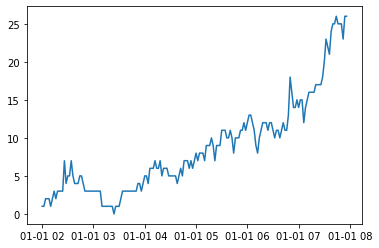

In [282]:
k = sorted(k.items())
x, y = zip(*k) 
plt.plot(x, y)
plt.show()

In [38]:
df_StreamRoot['content'].value_counts()

content-05333    2091
content-05335    1556
content-05334    1346
content-13697    1221
content-07770     971
                 ... 
content-10324       1
content-01070       1
content-16196       1
content-14779       1
content-13351       1
Name: content, Length: 16898, dtype: int64

In [103]:
df_exm['timestamp'].nsmallest(10)

167797    1562457767702
167798    1562457887633
167799    1562458007613
17434     1562458023114
167800    1562458127846
17435     1562458131265
167801    1562458247717
17436     1562458250582
17437     1562458370525
167802    1562458487958
Name: timestamp, dtype: int64

In [54]:
# df["somecolumn"] = df["somecolumn"].astype(int)
def pi_conc_10(df):
    contents = df['content'].unique()
    df_conc_10 = pd.DataFrame()
    for j in contents:
        df_new = df[df['content'] == j]
        if df_new['isFirstPayload'].sum() < 10:
            df_conc_10 = df_conc_10.append(df_new)
    return df_conc_10

In [75]:
weak_contents = []
df_new = df_stream_root[df_stream_root['content'] == 'content-00849']
if df_new['isFirstPayload'].sum() < 10:
    k = performance_indicator(df_new)
    print(k)
else:
    print('None')

7525433.71522095


In [55]:
df_conc_10 = pi_conc_10(df_stream_root)

In [77]:
df_ST_conc_10 = df_new[df_new['company'] == 'Streamroot TV']

In [79]:
df_ST_conc_10_LP = df_ST_conc_10[df_ST_conc_10['isLastPayLoad'] == True]

In [82]:
df_ST_conc_10_LP

,company,live,mediaEngine,p2p,cdn,upload,peers_count,peers_match,timestamp,sessionDuration,playbackErrorCount,totalPlaybackErrorCount,content,isFirstPayload,isLastPayLoad,readableDate
116673,Streamroot TV,VOD,ME1,0.0,1853304.0,351400.0,0.60,41,1562465870560,120000.0,0,0,content-00849,True,True,04:15
189152,Streamroot TV,VOD,ME1,0.0,0.0,12511440.0,19.63,23,1562479130941,17760000.0,0,0,content-00849,False,True,07:56
240239,Streamroot TV,VOD,ME1,0.0,0.0,282580.0,17.12,37,1562479164939,16800000.0,0,0,content-00849,False,True,07:57
252924,Streamroot TV,VOD,ME1,0.0,0.0,30720.0,1.33,40,1562465731190,5040000.0,0,0,content-00849,False,True,04:13
276540,Streamroot TV,VOD,ME1,0.0,0.0,1140388.0,0.89,40,1562471748565,4320000.0,0,0,content-00849,False,True,05:53
289961,Streamroot TV,VOD,ME1,6197420.0,0.0,4350224.0,3.72,40,1562461719057,720000.0,0,0,content-00849,False,True,03:06
310660,Streamroot TV,VOD,ME1,0.0,0.0,6001476.0,18.53,30,1562479102693,20040000.0,0,0,content-00849,False,True,07:56
350950,Streamroot TV,VOD,ME1,0.0,0.0,793440.0,5.89,40,1562467802341,6960000.0,0,0,content-00849,False,True,04:48
369216,Streamroot TV,VOD,ME1,7640884.0,0.0,11906328.0,19.01,40,1562460288153,1560000.0,0,0,content-00849,False,True,02:42


In [80]:
performance_indicator(df_ST_conc_10_LP)

8146666.666666667

In [80]:
performance_indicator(df_ST_conc_10_LP)

8146666.666666667